### Task 1

Imports `pandas` library to load data and `matplotlib` to make scatterplots.

In [80]:
import pandas as pd
import matplotlib.pyplot as plt

Loads the data from the `intrusion.csv` file into a pandas DataFrame.

In [81]:
data = pd.read_csv("intrusion.csv")

### Task 2
Plots `Attribute1` vs `Attribute2` to show that the data is separable by `Intrusion` based on features `Attribute1` and `Attribute2`.

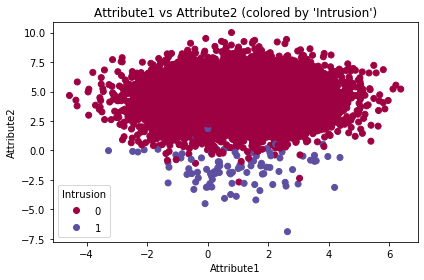

In [82]:
fig, axs = plt.subplots()
axs.set_title("Attribute1 vs Attribute2 (colored by 'Intrusion')")
scatter = axs.scatter(data["Attribute1"], data["Attribute2"], c=data["Intrusion"], cmap='Spectral')
axs.set(xlabel='Attribute1', ylabel='Attribute2')
axs.legend(*scatter.legend_elements(num=1), title="Intrusion")
fig.tight_layout()

Plots `Attribute2` vs `Attribute3` to show that the data is separable by `Intrusion` based on features `Attribute2` and `Attribute3`.

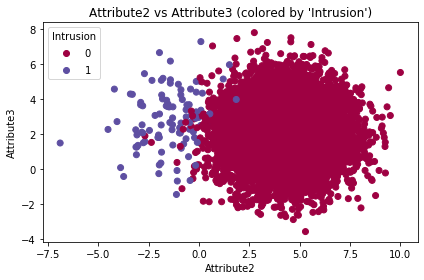

In [83]:
fig, axs = plt.subplots()
axs.set_title("Attribute2 vs Attribute3 (colored by 'Intrusion')")
scatter = axs.scatter(data["Attribute2"], data["Attribute3"], c=data["Intrusion"], cmap='Spectral')
axs.set(xlabel='Attribute2', ylabel='Attribute3')
axs.legend(*scatter.legend_elements(num=1), title="Intrusion")
fig.tight_layout()

Since the plots of `Attribute1`/`Attribue2` and `Attribute2`/`Attribute3` show a distinction between `Intrusion 0` and `Intrusion 1`, the data is separable since there exists a hyperplane between them if plotted in 3 dimensions.

### Task 3
Imports `sklearn` libaries for functions to split the data into training and testing sets, create models, and capture metrics to evaluate the models.

In [84]:
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics
from sklearn.metrics import confusion_matrix

Drops `Intrusion` column from the DataFrame since it is needed as a target, not to be used for training.

In [85]:
X = data.drop('Intrusion', axis = 1)
y = data['Intrusion']

Uses the `train_test_split` function to randomly split the data into 80% training data to train the models on, and 20% to test the models.

In [86]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

### Task 4 & 5
Define `test_model` function to test the different models
* `fit`: Fits model against training set
* `predict`: Predicts output based using test set
* `confusion_matrix`: Provides insight into number of correct and wrong predictions
* `classification_report`: Generates classification report to give summary of how well the model fits the test data

Note: `Positive` means `Intrusion 1` and `Negative` mean `Intrusion 0`

In [87]:
def test_model(model_name: str, model):
    model.fit(X_train, y_train)
    y_fit = model.predict(X_test)
    cfm = confusion_matrix(y_test, y_fit)
    print(f"{model_name} Model Results")
    print('-----------------------------------------------------')
    print(f"Model score:     {model.score(X_test, y_test)}")
    print(f'True positive:   {cfm[1][1]}')
    print(f'False positive:  {cfm[0][1]}')
    print(f'True negative:   {cfm[0][0]}')
    print(f'False negative:  {cfm[1][0]}')
    print(f"\n{model_name} Classification Report")
    print('-----------------------------------------------------')
    print(metrics.classification_report(y_test, y_fit))

Create and test Polynomial kernel model.

In [88]:
poly_model = SVC(kernel='poly', C=100000)
test_model("Poly", poly_model)

Poly Model Results
-----------------------------------------------------
Model score:     0.999009900990099
True positive:   15
False positive:  0
True negative:   2003
False negative:  2

Poly Classification Report
-----------------------------------------------------
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      2003
           1       1.00      0.88      0.94        17

    accuracy                           1.00      2020
   macro avg       1.00      0.94      0.97      2020
weighted avg       1.00      1.00      1.00      2020



Create and test Linear kernel model.

In [89]:
linear_model = SVC(kernel='linear', C=100000)
test_model("Linear", linear_model)

Linear Model Results
-----------------------------------------------------
Model score:     0.9985148514851485
True positive:   15
False positive:  1
True negative:   2002
False negative:  2

Linear Classification Report
-----------------------------------------------------
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      2003
           1       0.94      0.88      0.91        17

    accuracy                           1.00      2020
   macro avg       0.97      0.94      0.95      2020
weighted avg       1.00      1.00      1.00      2020



Create and test Radial Bias Function (RBF) kernel model.

In [90]:
rbf_model = SVC(kernel='rbf', C=100000)
test_model("RBF", rbf_model)

RBF Model Results
-----------------------------------------------------
Model score:     0.996039603960396
True positive:   13
False positive:  4
True negative:   1999
False negative:  4

RBF Classification Report
-----------------------------------------------------
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      2003
           1       0.76      0.76      0.76        17

    accuracy                           1.00      2020
   macro avg       0.88      0.88      0.88      2020
weighted avg       1.00      1.00      1.00      2020



### Task 6 & 7
Create and test Random Forest Classifier model.

In [91]:
rfc_model = RandomForestClassifier(n_estimators=1000)
test_model("Random Forest Classifier", rfc_model)

Random Forest Classifier Model Results
-----------------------------------------------------
Model score:     0.9985148514851485
True positive:   16
False positive:  2
True negative:   2001
False negative:  1

Random Forest Classifier Classification Report
-----------------------------------------------------
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      2003
           1       0.89      0.94      0.91        17

    accuracy                           1.00      2020
   macro avg       0.94      0.97      0.96      2020
weighted avg       1.00      1.00      1.00      2020

